## Tugas 6 : Decision Tree Classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import cv2 as cv

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = "https://raw.githubusercontent.com/wahyuarilsaputra/dataset/main/IRIS.csv"
data = pd.read_csv(dataset)

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
data=data.replace(to_replace='Iris-setosa',value=0)
data=data.replace(to_replace='Iris-versicolor',value=1)
data=data.replace(to_replace='Iris-virginica',value=2)

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
X=data.iloc[:,1:-1]
X.head()

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [ ]:
Y=data.iloc[:,-1:]
Y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
giniindex=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,random_state=100)

In [ ]:
giniindex.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [ ]:
y_pred=giniindex.predict(X_test)

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Entropy

In [ ]:
entropy_deci=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=100)

In [ ]:
entropy_deci.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [ ]:
y_pred_entropy=entropy_deci.predict(X_test)

In [ ]:
confusion_matrix(Y_test,y_pred_entropy)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
print(classification_report(Y_test,y_pred_entropy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Gini Index

In [ ]:
from sklearn import tree

[Text(0.34615384615384615, 0.9, 'X[2] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2692307692307692, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4230769230769231, 0.7, 'X[1] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.5, 'X[2] <= 1.45\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.23076923076923078, 0.3, 'X[0] <= 3.05\ngini = 0.219\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(0.15384615384615385, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3076923076923077, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.6923076923076923, 0.5, 'X[2] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.5384615384615384, 0.3, 'X[1] <= 5.05\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.46153846153846156, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.6153846153846154, 

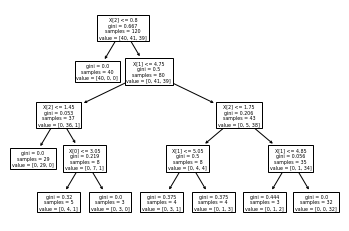

In [ ]:
tree.plot_tree(giniindex)

[Text(0.34615384615384615, 0.9, 'X[2] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2692307692307692, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4230769230769231, 0.7, 'X[1] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.5, 'X[2] <= 1.45\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.23076923076923078, 0.3, 'X[0] <= 3.05\nentropy = 0.544\nsamples = 8\nvalue = [0, 7, 1]'),
 Text(0.15384615384615385, 0.1, 'entropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.3076923076923077, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.6923076923076923, 0.5, 'X[2] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.5384615384615384, 0.3, 'X[1] <= 5.05\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.46153846153846156, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = [0, 3

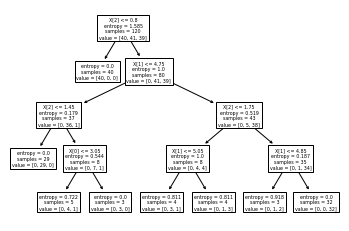

In [ ]:
tree.plot_tree(entropy_deci)